In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import os
import warnings

In [51]:
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']= (15,8)

In [52]:
COUNTRY = 'DE'
DATA_PATH = os.path.join('..', 'data', f'{COUNTRY}.csv')

In [53]:
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp'], index_col='timestamp')
load_series = df['load']
d = 1 
D = 1
s = 24

print(f"Loaded data for {COUNTRY}. Using differencing: d={d}, D={D}, s={s}")

Loaded data for DE. Using differencing: d=1, D=1, s=24


In [54]:
load_diff_1 = load_series.diff(1)
load_stationary = load_diff_1.diff(s)
load_stationary = load_stationary.dropna()

print("fully differenced stationary series")

fully differenced stationary series


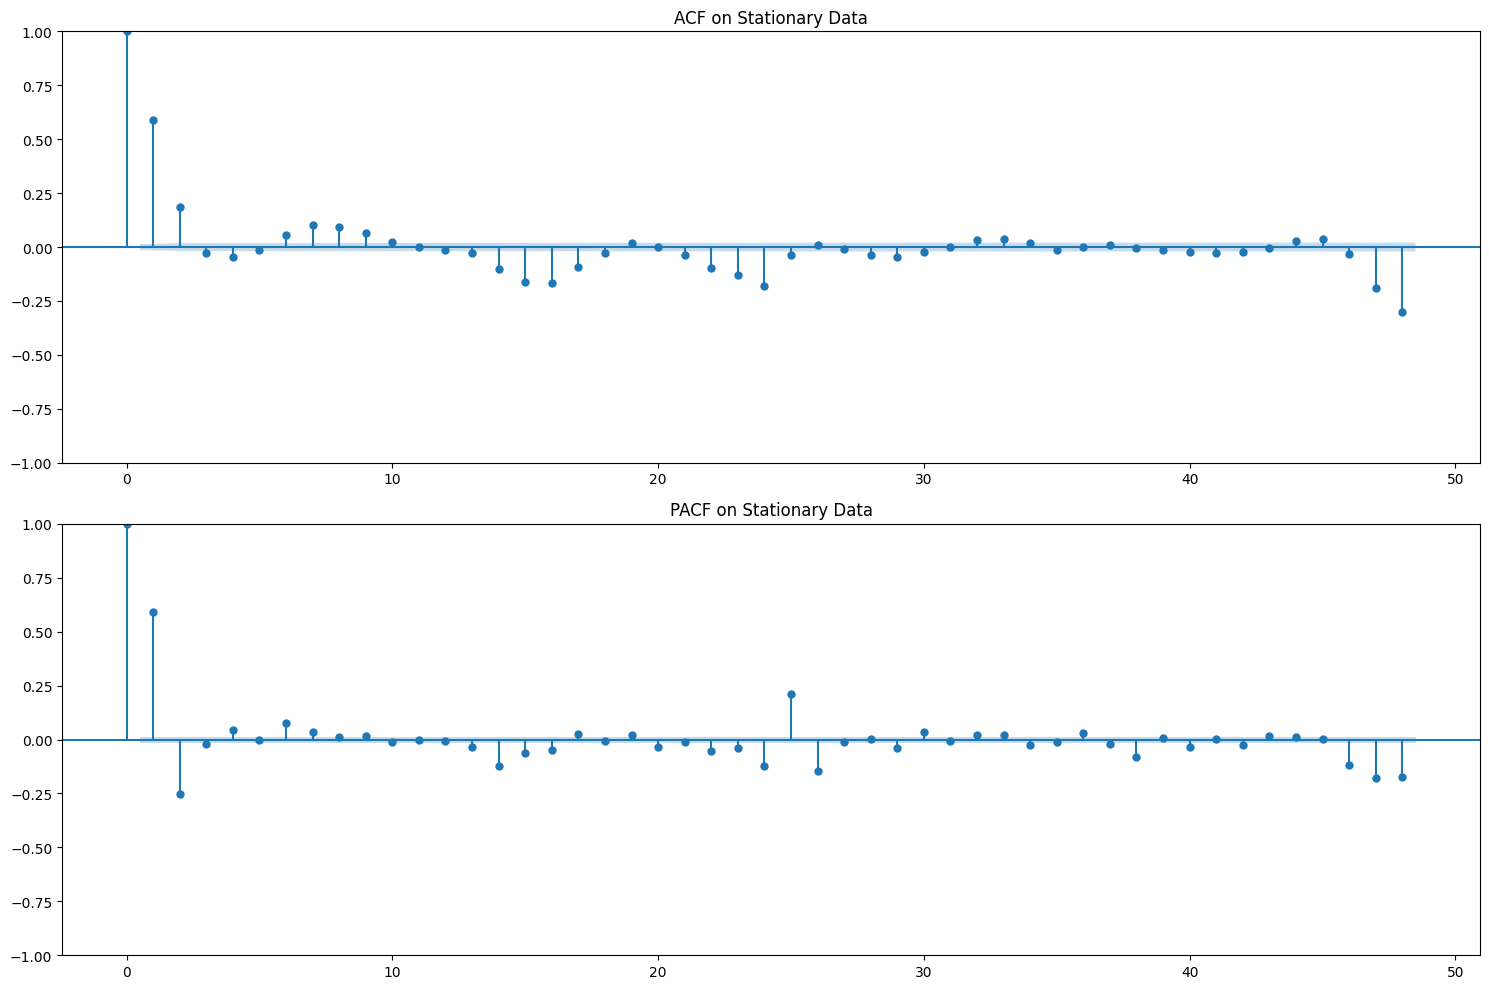

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

plot_acf(load_stationary, lags=48, ax=ax[0])
ax[0].set_title('ACF on Stationary Data')

plot_pacf(load_stationary, lags=48, ax=ax[1])
ax[1].set_title('PACF on Stationary Data')

plt.tight_layout()
plt.show()

SARIMA GRID SEARCH

In [56]:
#non seasonal 
p_range = range(0,2)  
q_range = range(0,2)  

#seasonal
P_range = range(0,2)
Q_range = range(0,2)

pdq = list(itertools.product(p_range, [d], q_range))
seasonal_pdq = list(itertools.product(P_range, [D], Q_range, [s]))

In [57]:
print("total non-seasonal comb:", len(pdq))
print("total seasonal comb:", len(seasonal_pdq))
print("total models ", len(pdq) * len(seasonal_pdq))

total non-seasonal comb: 4
total seasonal comb: 4
total models  16


In [58]:

split_point = int(len(load_series) * 0.8)
train_data = load_series.iloc[:split_point]

train_subset = train_data.iloc[-720:] 
print(f"Using last 30 days ({len(train_subset)} hours) for grid search")

Using last 30 days (720 hours) for grid search


In [59]:
best_bic = float('inf')
best_order = None
best_seasonal_order = None
results_list = []

print(f"Testing {len(pdq) * len(seasonal_pdq)} models...")

for i, (order, seasonal_order) in enumerate(itertools.product(pdq, seasonal_pdq)):
    try:
        if i % 4 == 0:
            print(f"Progress: {i}/{len(pdq) * len(seasonal_pdq)}", end='\r')
        
        model = sm.tsa.SARIMAX(train_subset,  
                               order=order,
                               seasonal_order=seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False)
        res = model.fit(disp=False, maxiter=50)  
        results_list.append((order, seasonal_order, res.bic, res.aic))
        
        if res.bic < best_bic:
            best_bic = res.bic
            best_order = order
            best_seasonal_order = seasonal_order
    except Exception as e:  
        continue

print(f"\nBest model for {COUNTRY}")
print(f"Order (p,d,q): {best_order}")
print(f"Seasonal order (P,D,Q,s): {best_seasonal_order}")
print(f"Best BIC: {best_bic:.2f}")

Testing 16 models...
Progress: 12/16
Best model for DE
Order (p,d,q): (1, 1, 1)
Seasonal order (P,D,Q,s): (1, 1, 1, 24)
Best BIC: 10928.22

Best model for DE
Order (p,d,q): (1, 1, 1)
Seasonal order (P,D,Q,s): (1, 1, 1, 24)
Best BIC: 10928.22


In [60]:
results_df = pd.DataFrame(results_list, columns=['order(p,d,q)', 'seasonal_order(P,D,Q,s)', 'BIC', 'AIC'])
results_df = results_df.sort_values(by='BIC')
output_path = os.path.join('..', 'outputs', f'{COUNTRY}_sarima_orders.csv')
results_df.to_csv(output_path, index=False)

print("\n--- Top 5 Models ---")
print(results_df.head())


--- Top 5 Models ---
   order(p,d,q) seasonal_order(P,D,Q,s)           BIC           AIC
15    (1, 1, 1)           (1, 1, 1, 24)  10928.216855  10905.687935
7     (0, 1, 1)           (1, 1, 1, 24)  11007.536590  10989.513453
13    (1, 1, 1)           (0, 1, 1, 24)  11025.527718  11007.504582
11    (1, 1, 0)           (1, 1, 1, 24)  11034.693597  11016.664487
14    (1, 1, 1)           (1, 1, 0, 24)  11080.662476  11062.633365


FRANCE

In [61]:
COUNTRY = 'FR'
DATA_PATH = os.path.join('..', 'data', f'{COUNTRY}.csv')

In [62]:
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp'], index_col='timestamp')
load_series = df['load']
d = 1 
D = 1
s = 24

print(f"Loaded data for {COUNTRY}. Using differencing: d={d}, D={D}, s={s}")

Loaded data for FR. Using differencing: d=1, D=1, s=24


In [63]:
load_diff_1 = load_series.diff(1)
load_stationary = load_diff_1.diff(s)
load_stationary = load_stationary.dropna()

print("fully differenced stationary series")

fully differenced stationary series


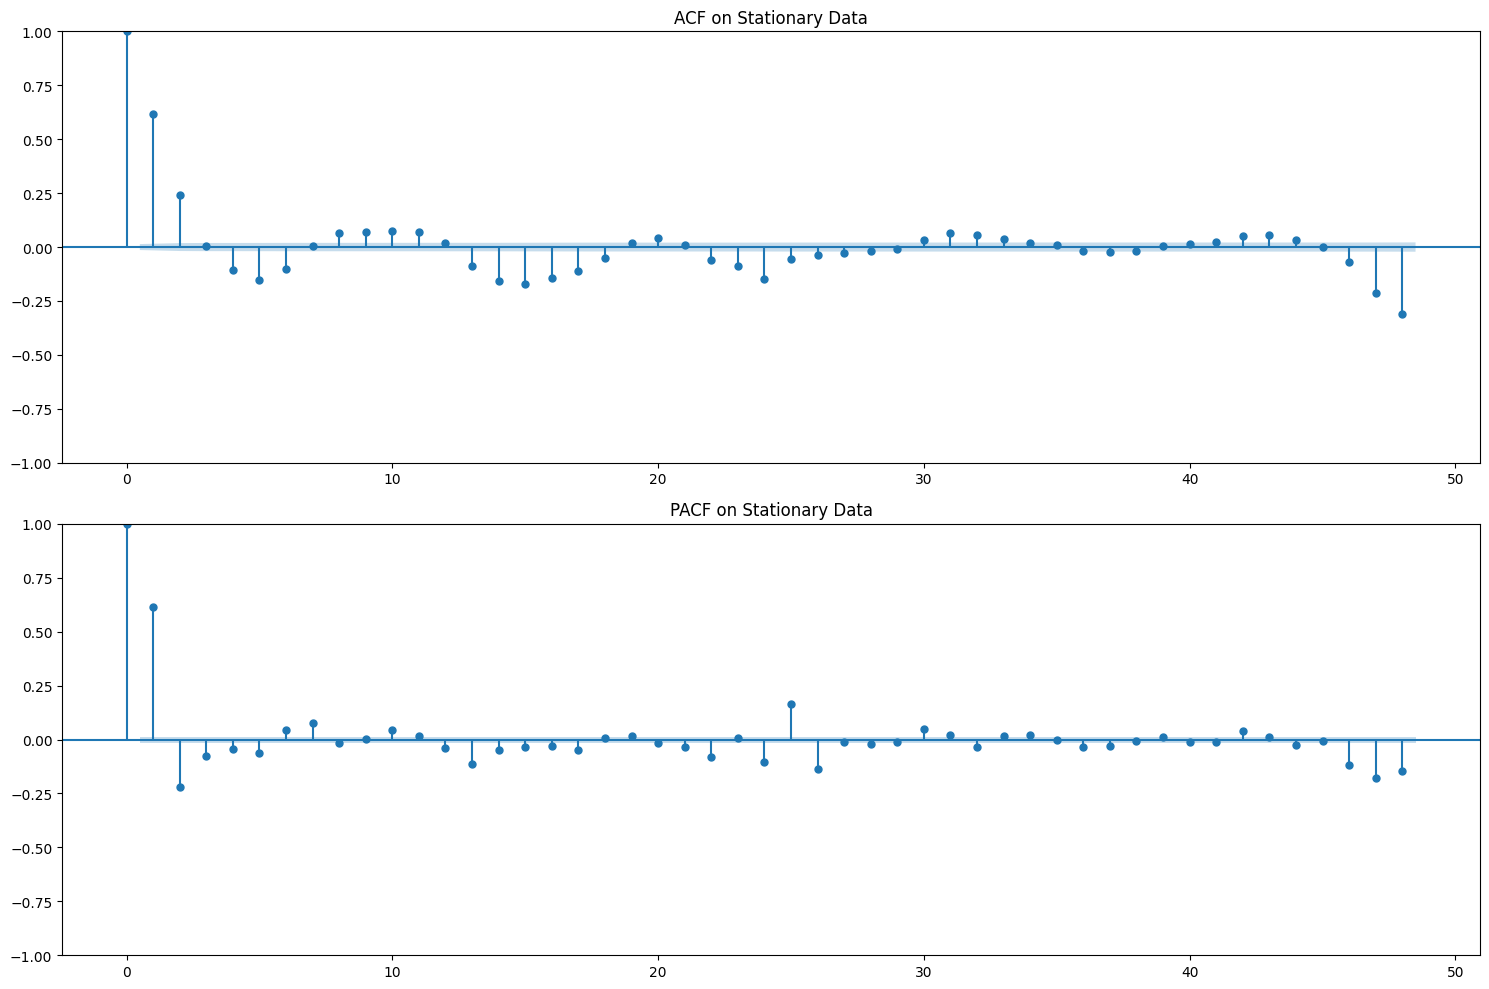

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

plot_acf(load_stationary, lags=48, ax=ax[0])
ax[0].set_title('ACF on Stationary Data')

plot_pacf(load_stationary, lags=48, ax=ax[1])
ax[1].set_title('PACF on Stationary Data')

plt.tight_layout()
plt.show()

In [65]:
#non seasonal 
p_range = range(0,2)  
q_range = range(0,2)  

#seasonal
P_range = range(0,2)
Q_range = range(0,2)

pdq = list(itertools.product(p_range, [d], q_range))
seasonal_pdq = list(itertools.product(P_range, [D], Q_range, [s]))

In [66]:
print("total non-seasonal comb:", len(pdq))
print("total seasonal comb:", len(seasonal_pdq))
print("total models ", len(pdq) * len(seasonal_pdq))

total non-seasonal comb: 4
total seasonal comb: 4
total models  16


In [67]:

split_point = int(len(load_series) * 0.8)
train_data = load_series.iloc[:split_point]

train_subset = train_data.iloc[-720:] 
print(f"Using last 30 days ({len(train_subset)} hours) for grid search")

Using last 30 days (720 hours) for grid search


In [68]:
best_bic = float('inf')
best_order = None
best_seasonal_order = None
results_list = []

print(f"Testing {len(pdq) * len(seasonal_pdq)} models...")

for i, (order, seasonal_order) in enumerate(itertools.product(pdq, seasonal_pdq)):
    try:
        if i % 4 == 0:
            print(f"Progress: {i}/{len(pdq) * len(seasonal_pdq)}", end='\r')
        
        model = sm.tsa.SARIMAX(train_subset,  
                               order=order,
                               seasonal_order=seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False)
        res = model.fit(disp=False, maxiter=50)  
        results_list.append((order, seasonal_order, res.bic, res.aic))
        
        if res.bic < best_bic:
            best_bic = res.bic
            best_order = order
            best_seasonal_order = seasonal_order
    except Exception as e:  
        continue

print(f"\nBest model for {COUNTRY}")
print(f"Order (p,d,q): {best_order}")
print(f"Seasonal order (P,D,Q,s): {best_seasonal_order}")
print(f"Best BIC: {best_bic:.2f}")

Testing 16 models...
Progress: 12/16
Best model for FR
Order (p,d,q): (1, 1, 1)
Seasonal order (P,D,Q,s): (1, 1, 1, 24)
Best BIC: 10550.19

Best model for FR
Order (p,d,q): (1, 1, 1)
Seasonal order (P,D,Q,s): (1, 1, 1, 24)
Best BIC: 10550.19


In [69]:
results_df = pd.DataFrame(results_list, columns=['order(p,d,q)', 'seasonal_order(P,D,Q,s)', 'BIC', 'AIC'])
results_df = results_df.sort_values(by='BIC')
output_path = os.path.join('..', 'outputs', f'{COUNTRY}_sarima_orders.csv')
results_df.to_csv(output_path, index=False)

print("\n--- Top 5 Models ---")
print(results_df.head())


--- Top 5 Models ---
   order(p,d,q) seasonal_order(P,D,Q,s)           BIC           AIC
15    (1, 1, 1)           (1, 1, 1, 24)  10550.191566  10527.662646
7     (0, 1, 1)           (1, 1, 1, 24)  10602.731178  10584.708042
13    (1, 1, 1)           (0, 1, 1, 24)  10613.774486  10595.751350
11    (1, 1, 0)           (1, 1, 1, 24)  10622.611401  10604.582290
5     (0, 1, 1)           (0, 1, 1, 24)  10663.079717  10649.562365


SPAIN

In [78]:
COUNTRY = 'ES'
DATA_PATH = os.path.join('..', 'data', f'{COUNTRY}.csv')

In [79]:
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp'], index_col='timestamp')
load_series = df['load']
d = 1 
D = 1
s = 24

print(f"Loaded data for {COUNTRY}. Using differencing: d={d}, D={D}, s={s}")


Loaded data for ES. Using differencing: d=1, D=1, s=24


In [80]:
load_diff_1 = load_series.diff(1)
load_stationary = load_diff_1.diff(s)
load_stationary = load_stationary.dropna()

print("fully differenced stationary series")

fully differenced stationary series


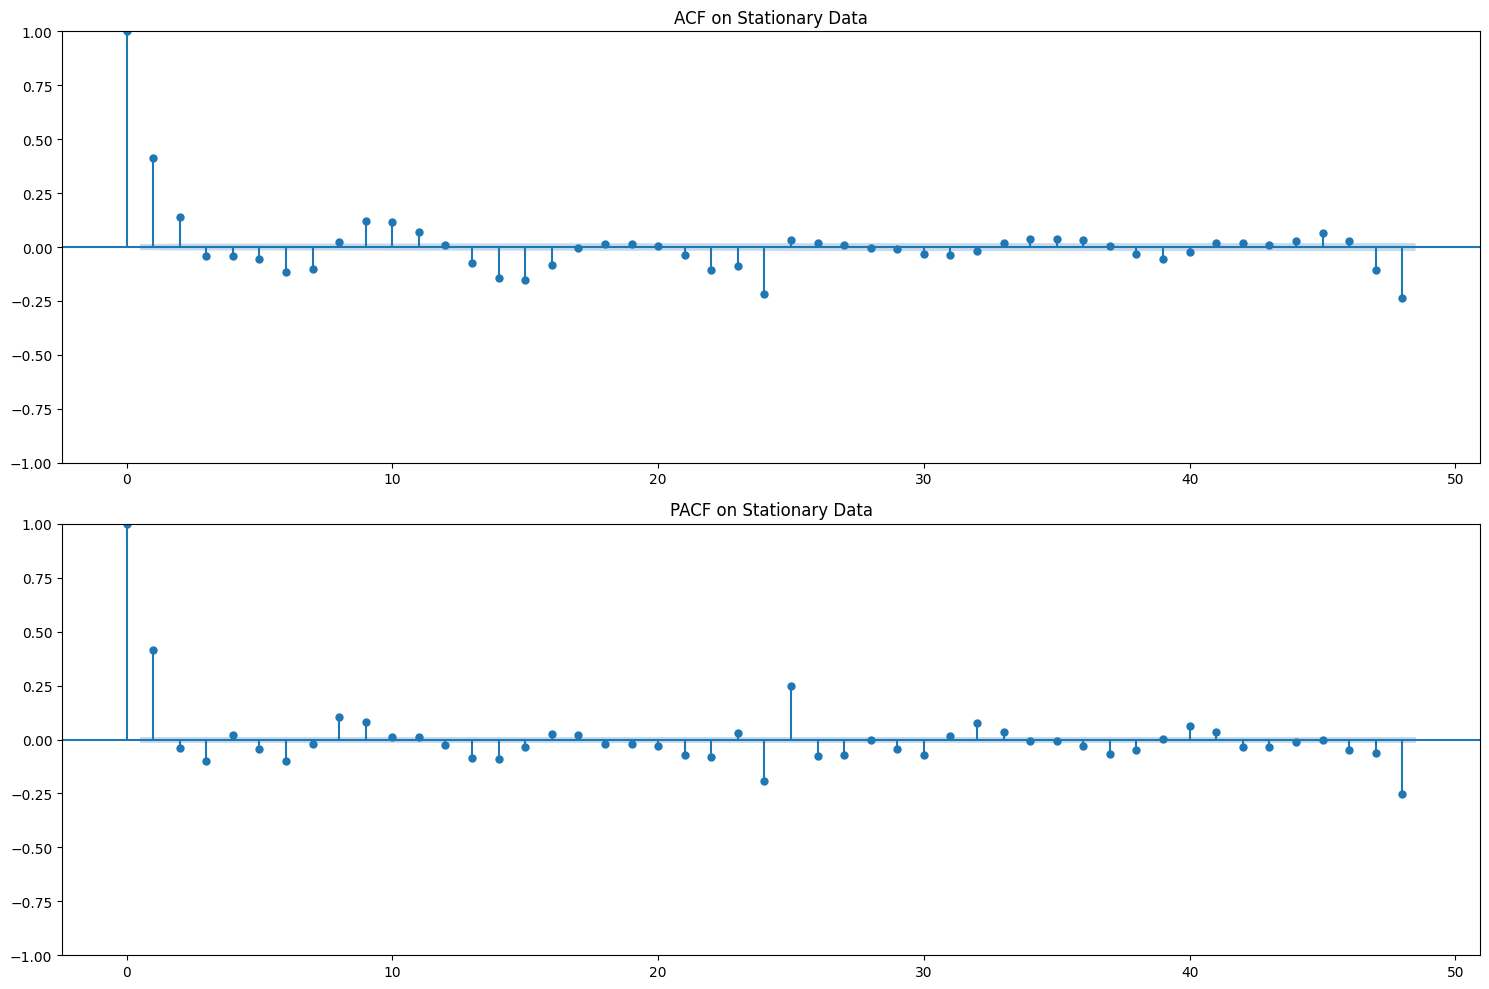

In [81]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

plot_acf(load_stationary, lags=48, ax=ax[0])
ax[0].set_title('ACF on Stationary Data')

plot_pacf(load_stationary, lags=48, ax=ax[1])
ax[1].set_title('PACF on Stationary Data')

plt.tight_layout()
plt.show()

In [82]:
#non seasonal 
p_range = range(0,2)  
q_range = range(0,2)  

#seasonal
P_range = range(0,2)
Q_range = range(0,2)

pdq = list(itertools.product(p_range, [d], q_range))
seasonal_pdq = list(itertools.product(P_range, [D], Q_range, [s]))

In [83]:
print("total non-seasonal comb:", len(pdq))
print("total seasonal comb:", len(seasonal_pdq))
print("total models ", len(pdq) * len(seasonal_pdq))

total non-seasonal comb: 4
total seasonal comb: 4
total models  16


In [84]:

split_point = int(len(load_series) * 0.8)
train_data = load_series.iloc[:split_point]

train_subset = train_data.iloc[-720:] 
print(f"Using last 30 days ({len(train_subset)} hours) for grid search")

Using last 30 days (720 hours) for grid search


In [85]:
best_bic = float('inf')
best_order = None
best_seasonal_order = None
results_list = []

print(f"Testing {len(pdq) * len(seasonal_pdq)} models...")

for i, (order, seasonal_order) in enumerate(itertools.product(pdq, seasonal_pdq)):
    try:
        if i % 4 == 0:
            print(f"Progress: {i}/{len(pdq) * len(seasonal_pdq)}", end='\r')
        
        model = sm.tsa.SARIMAX(train_subset,  
                               order=order,
                               seasonal_order=seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False)
        res = model.fit(disp=False, maxiter=50)  
        results_list.append((order, seasonal_order, res.bic, res.aic))
        
        if res.bic < best_bic:
            best_bic = res.bic
            best_order = order
            best_seasonal_order = seasonal_order
    except Exception as e:  
        continue

print(f"\nBest model for {COUNTRY}")
print(f"Order (p,d,q): {best_order}")
print(f"Seasonal order (P,D,Q,s): {best_seasonal_order}")
print(f"Best BIC: {best_bic:.2f}")

Testing 16 models...
Progress: 12/16
Best model for ES
Order (p,d,q): (1, 1, 1)
Seasonal order (P,D,Q,s): (1, 1, 1, 24)
Best BIC: 10253.30

Best model for ES
Order (p,d,q): (1, 1, 1)
Seasonal order (P,D,Q,s): (1, 1, 1, 24)
Best BIC: 10253.30


In [86]:
results_df = pd.DataFrame(results_list, columns=['order(p,d,q)', 'seasonal_order(P,D,Q,s)', 'BIC', 'AIC'])
results_df = results_df.sort_values(by='BIC')
output_path = os.path.join('..', 'outputs', f'{COUNTRY}_sarima_orders.csv')
results_df.to_csv(output_path, index=False)

print("\n--- Top 5 Models ---")
print(results_df.head())


--- Top 5 Models ---
   order(p,d,q) seasonal_order(P,D,Q,s)           BIC           AIC
15    (1, 1, 1)           (1, 1, 1, 24)  10253.295299  10230.766378
7     (0, 1, 1)           (1, 1, 1, 24)  10258.298264  10240.275127
13    (1, 1, 1)           (0, 1, 1, 24)  10260.390505  10242.367369
5     (0, 1, 1)           (0, 1, 1, 24)  10266.254963  10252.737610
11    (1, 1, 0)           (1, 1, 1, 24)  10276.092111  10258.063000
